# 4. Expectation

## Brief summary

### Expectation of a discrete r.v.

The *expected value* (also called the *expectation* or *mean*) of a discrete r.v. $X$ whose distinct possible values are $x_1, x_2, ...$ is defined by

\begin{equation}
E(X) = \sum_{j=1}^\infty x_jP(X=x_j).
\end{equation}

If the support is finite, then this is replaced by a finite sum. We can also write

\begin{equation}
E(X) = \sum_x x(X=x)
\end{equation}

where the sum is over the support of $X$.

An equivalent "ungrouped" way of calculating expectation is 

\begin{equation}
E(X) = \sum_s X(s)P(\{s\})
\end{equation}

### Linearity of expectation

For any r.v.s $X$, $Y$ and any constant $c$,

\begin{equation}
E(X+Y) = E(X) + E(Y) \\
E(cX) = cE(X)
\end{equation}

### Geometric distribution

Consider a sequence of independent Bernoulli trials, each with the same success probability $p \in (0,1)$, with trials performed until a success occurs. Let $X$ be the number of *failures* before the first successful trial. Then $X$ has the *Geometric distribution* with parameter $p$: $X \sim Geom(p)$.

If $X \sim Geom(p)$, then the PMF of $X$ is 

\begin{equation}
P(X=k) = q^kp
\end{equation}

for $k = 0, 1, 2, ...$, where $q = 1 - p$.

#### First Success distribution

Let $Y$ be the number of *trials* until the first successful trial, including the success. Then $Y$ has the *First Success distribution* with parameter $p$: $Y \sim FS(p)$.

If $Y \sim FS(p)$, then $Y - 1 \sim Geom(p)$ and the PMF of $Y$ is

\begin{equation}
P(Y=k) = q^{k-1}p
\end{equation}

for $k = 1, 2, 3, ...$, where $q = 1 - p$.

### Negative binomial distribution

In a sequence of independent Bernoulli trials with success probability $p$, if $X$ is the number of *failures* before the $r$th success, then $X$ is said to have the *Negative Binomial distribution* with parameters $r$ and $p$: $X \sim NBin(r,p)$.

If $X \sim NBin(r,p)$, then the PMF of $X$ is 

\begin{equation}
P(X=n) = {{n+r-1}\choose{r-1}}p^rq^n
\end{equation}

for $n = 0, 1, 2, ...$, where $q = 1 - p$.

### Indicator r.v. properties

Let $A$ and $B$ the events. Then the following properties hold.

1. $(I_A)^k = I_A$ for any positive integer $k$.
2. $I_{A^c} = 1 - I_A$.
3. $I_{A \cap B} = I_AI_B$.
4. $I_{A \cup B} = I_A + I_B - I_AI_B$.

### Fundamental bridge between probability and expectation

There is a one-to-one correspondence between events and indicator r.v.s, and the probability of an event $A$ is the expected value of its indicator r.v. $I_A$:

\begin{equation}
P(A) = E(I_A).
\end{equation}

### The Law of the unconscious statistician (LOTUS)

If $X$ is a discrete r.v. and $g$ is a function from $\mathbb{R}$ to $\mathbb{R}$, then

\begin{equation}
E(g(X)) = \sum_x g(x)P(X=x),
\end{equation}

where the sum is taken over all possible values of $X$.


### Variance and standard deviation

The *variance* of an r.v. $X$ is 

\begin{equation}
Var(X) = E(X - EX)^2.
\end{equation}

The square root of the variance is called the *standard deviation* (SD):

\begin{equation}
SD(X) = \sqrt{Var(X)}.
\end{equation}

#### Another formula for variance

For any r.v. $X$,

\begin{equation}
Var(X) = E(X^2) - (EX)^2
\end{equation}

### Poisson distribution

An r.v. $X$ has the *Poisson distribution* with parameter $\lambda$ if the PMF of $X$ is

\begin{equation}
P(X=k) = \frac{e^{-\lambda}\lambda^k} {k!},\ k = 0, 1, 2, ...
\end{equation}

We write this as $X \sim Pois(\lambda)$.

The Poisson distribution is often used in situations where we are counting the number of successes in a particular region or interval of time, and there are a large number of trials, each with a small probability of success.

#### Poisson approximation to Binomial

If $X \sim Bin(n,p)$ and we let $n \to \infty$ and $p \to 0$ such that $\lambda = np$ remains fixed, then the PMF of $X$ converges to the $Pois(\lambda)$ PMF. More generally, the same conclusion holds if $n \to \infty$ and $p \to 0$ in such a way that $np$ converges to a constant $\lambda$.


## Python examples

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import geom, nbinom, poisson
from numpy.random import choice
from numpy.random import permutation

%matplotlib inline
%load_ext autoreload
%autoreload 2

### Geometric distribution

\begin{equation}
P(X=k) = q^kp
\end{equation}

In [2]:
p = 0.5
X = np.arange(7)
print(geom.pmf(X+1, p))
print(geom.cdf(X+1, p))
print(geom.rvs(p, size=100))

[ 0.5        0.25       0.125      0.0625     0.03125    0.015625
  0.0078125]
[ 0.5        0.75       0.875      0.9375     0.96875    0.984375
  0.9921875]
[2 3 1 1 1 1 3 1 3 1 4 1 2 1 1 4 2 2 4 1 2 4 7 2 1 2 2 1 7 1 1 1 1 1 1 1 4
 1 1 2 1 1 1 3 2 3 1 1 1 1 2 1 3 1 3 5 1 1 3 3 2 2 1 1 1 3 1 4 1 1 1 1 2 1
 2 2 2 3 1 3 2 1 1 1 1 1 1 1 1 2 1 2 4 2 2 3 3 1 2 1]


<Container object of 7 artists>

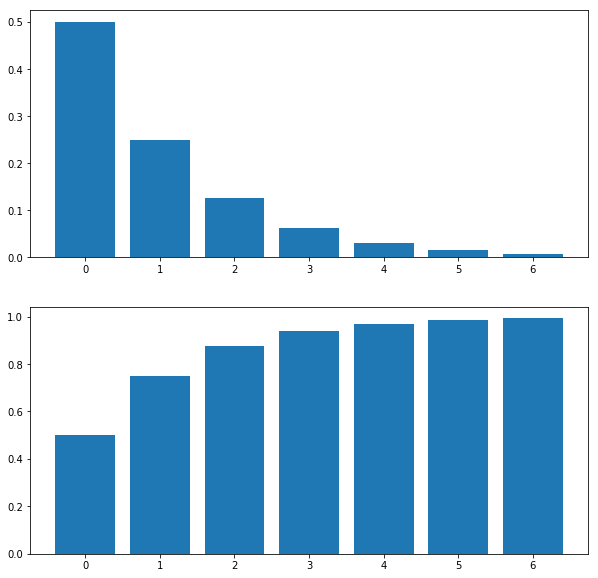

In [3]:
fig, axes = plt.subplots(2, 1, figsize=(10, 10))
axes[0].bar(X, geom.pmf(X+1, p))
axes[1].bar(X, geom.cdf(X+1, p))

### Negative binomial distribution

\begin{equation}
P(X=n) = {{n+r-1}\choose{r-1}}p^rq^n
\end{equation}

In [4]:
r, p = 5, 0.5
X = np.arange(7)
print(nbinom.pmf(X, r, p))
print(nbinom.cdf(X, r, p))

[ 0.03125     0.078125    0.1171875   0.13671875  0.13671875  0.12304687
  0.10253906]
[ 0.03125     0.109375    0.2265625   0.36328125  0.5         0.62304687
  0.72558594]


### Poisson distribution

\begin{equation}
P(X=k) = \frac{e^{-\lambda}\lambda^k} {k!},\ k = 0, 1, 2, ...
\end{equation}

In [5]:
l = 2
X = np.arange(7)
print(poisson.pmf(X, l))
print(poisson.cdf(X, l))

[ 0.13533528  0.27067057  0.27067057  0.18044704  0.09022352  0.03608941
  0.0120298 ]
[ 0.13533528  0.40600585  0.67667642  0.85712346  0.94734698  0.98343639
  0.99546619]


<Container object of 10 artists>

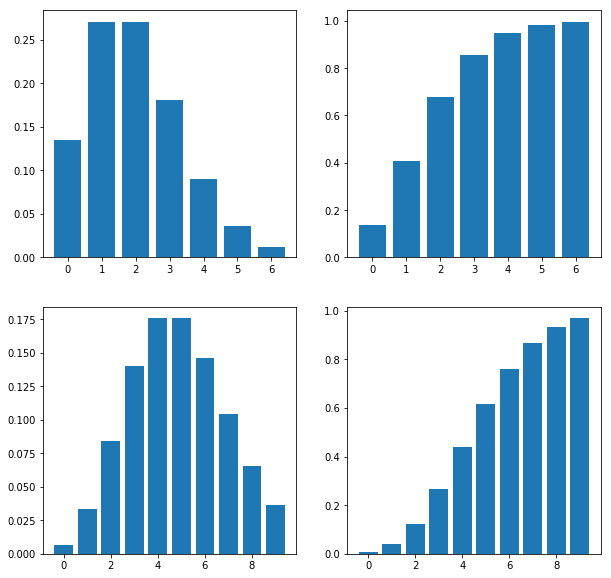

In [6]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
X = np.arange(7)
l = 2
axes[0, 0].bar(X, poisson.pmf(X, l))
axes[0, 1].bar(X, poisson.cdf(X, l))
X = np.arange(10)
l = 5
axes[1, 0].bar(X, poisson.pmf(X, l))
axes[1, 1].bar(X, poisson.cdf(X, l))

### Matching simulation

In [7]:
n = 100
num_trials = 10**4
results = []
for i in range(num_trials):
    results.append(np.sum(permutation(n) == np.arange(n)))
print(np.mean(results))

1.0096


### Distinct birthdays simulation

In [8]:
k = 20
num_trials = 10**4
results = []
for i in range(num_trials):
    bdays =np.random.choice(np.arange(365), size=k, replace=True)
    results.append(len(np.unique(bdays)))
print(np.mean(results))
print(365*(1-(364/365.)**k))

19.4779
19.4879102391
